In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',500)
from itertools import cycle
plt.style.use('ggplot')
import re




In [3]:
#load the data
data = pd.read_csv('/home/christine/Desktop/Tweet/tweets.csv')

In [4]:
data.shape

(234186, 5)

In [5]:
data.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [6]:
print(data['tweet_text'][0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [7]:
def process_tweets(data):

    data['tweet_datetime'] = pd.to_datetime(data['tweet_date'])
    data['tweet_date'] = data['tweet_datetime'].dt.date
    data['n_attempts'] = data['tweet_text'].str[11].astype('int')
    data['wordle_id'] = data['tweet_text'].str[:10]
    data['n_attempts'] = data['tweet_text'].str[11].astype('int')
    data['id'] = data['tweet_text'].str[7:10].astype('int')
    return data
data = process_tweets(data)

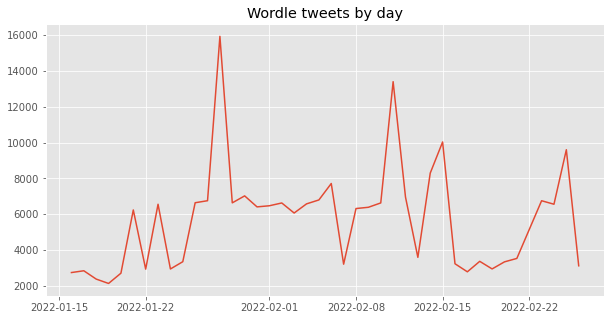

In [8]:
#number of tweets for each date
data['tweet_date'].value_counts().plot(figsize=(10,5),title='Wordle tweets by day')
plt.show()

In [9]:
#number of attempts analysis
data.groupby('wordle_id')['n_attempts'].value_counts().unstack().style.background_gradient(axis=1)

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


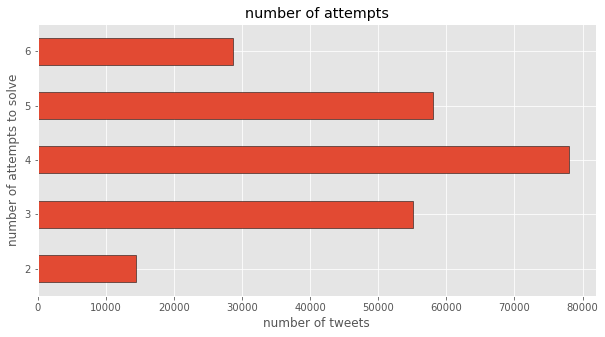

In [10]:
#how many attempts does it take to solve
data['n_attempts'].value_counts()\
    .sort_index() \
    .plot(figsize=(10,5),kind='barh',
          title='number of attempts',
          edgecolor='black')
plt.xlabel('number of tweets')
plt.ylabel('number of attempts to solve')
plt.show()


In [11]:
#make the dark squares consistent
data['tweet_text'] = data['tweet_text'].str.replace('⬜','⬛')

In [12]:
def parse_tweet_text(data):
    for n in range(6):

        n+=1

        data[f'has_guess{n}'] = data['tweet_text'].str.split('\n').str[n+1]\
            .str.contains('|'.join(['🟨','⬛','🟩']))\
            .fillna(False)


        #data['has_guess1'].value_counts()

        #parse out the tweet text for this guess
        data.loc[data[f'has_guess{n}'],f'guess{n}']= data['tweet_text'].str.split('\n').str[n+1].str[:5]
        #count correct,misplaced and incorrect numbers
        data.loc[data[f'has_guess{n}'],
                f'guess{n}_incorrect'] = data[f'guess{n}'].str.count('⬛')
        data.loc[data[f'has_guess{n}'],
                f'guess{n}_wrong_spot'] = data[f'guess{n}'].str.count('🟨')
        data.loc[data[f'has_guess{n}'],
                f'guess{n}_correct'] = data[f'guess{n}'].str.count('🟩')

        data.loc[data[f'guess{n}_correct'] == 6,'final_guess'] = n

    return data
data = parse_tweet_text(data)

In [13]:
data['additional_text']= data.loc[~data['tweet_text'] \
                                  .str.split('\n').str[-1].str.contains('🟩')]\
                                  ['tweet_text'].str.split('\n').str[-1]

In [14]:
data['additional_text']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
234181     NaN
234182    Bruh
234183     NaN
234184     NaN
234185     NaN
Name: additional_text, Length: 234186, dtype: object

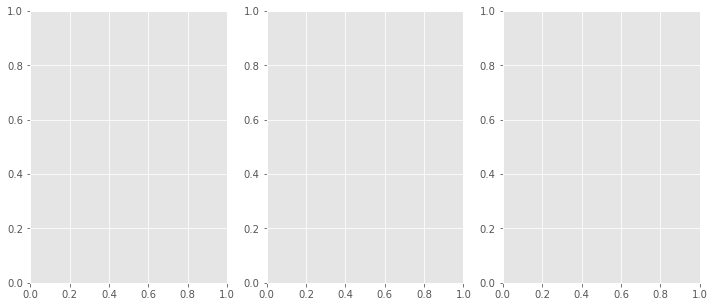

In [16]:
#plot results by attempt
fig,axs = plt.subplots(1,3,figsize=(12,5),sharex=True)
for i,x in enumerate(['correct','incorrect','wrong_spot']):
    col_subset = [c for c in data.columns if x in c]
    break

In [23]:
guess_avg = data[col_subset].mean()
guess_avg.index = [f'Guess{1+1}'for i in range (6)]
guess_avg.sort_index(ascending=False) \
    .plot(kind='barh',
          title=f'{x.strip('_').replace('-','').title()}',
          ax=axs[1],
          color=color_pal[1+1])

SyntaxError: invalid syntax (<ipython-input-23-9d5a9882a649>, line 5)